In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from statsmodels.tsa.api import VAR,SVAR
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import StandardScaler

Giới thiệu sơ qua về tập dữ liệu thì chúng ta chỉ có 21 điểm dữ liệu trải dài từ năm 2001 đến năm 2022. Nếu như chúng ta chỉ sử dựng 2 feature là lượng khí Co2 phát thải từng năm và diện tích rừng bị phá hủy từng năm thì chúng ta có thể thấy được rằng 2 feature này có mối quan hệ đơn giản nhưng không đủ phức tạp để đưa vào dự đoán. Vì vậy đội chúng em quyết định đề xuất thêm 2 feature nữa vào đó chính là GDP và mật độ dân số.
- GDP là thước đo tổng sản phẩm quốc nội của một quốc gia. GDP cao hơn thường đi kèm với tiêu dùng năng lượng cao hơn, dẫn đến phát thải CO2 cao hơn. Điều này là do GDP cao hơn thường đi kèm với tăng trưởng kinh tế, dẫn đến nhu cầu sử dụng năng lượng cao hơn cho các mục đích như sản xuất, vận tải và tiêu dùng.


- Mật độ dân số là số lượng người sinh sống trên một đơn vị diện tích nhất định. Mật độ dân số cao hơn thường đi kèm với nhu cầu sử dụng năng lượng cao hơn, dẫn đến phát thải CO2 cao hơn. Điều này là do mật độ dân số cao hơn thường đi kèm với đô thị hóa, dẫn đến nhu cầu sử dụng năng lượng cao hơn cho các mục đích như giao thông, sưởi ấm và làm mát.

Chúng ta xem xét tương quan dữ liệu giữa các feature với nhau như sau:

In [25]:
data = pd.read_csv("TimeData.csv")
data.sample(5)
data.head()

,Year,TreeLost(Ha),Co2Emission,GDP,PopulationDensity,TreeCoverExtent
0,2001,47433.130184,2.396864e+07,32.69,258.0,119444.96
1,2002,49625.437823,2.491733e+07,35.06,238.9,121048.92
2,2003,43007.848447,2.201878e+07,39.55,242.0,122652.88
3,2004,73880.881536,3.959157e+07,45.43,244.9,124256.84
4,2005,102211.118782,5.542130e+07,57.63,247.8,125860.80


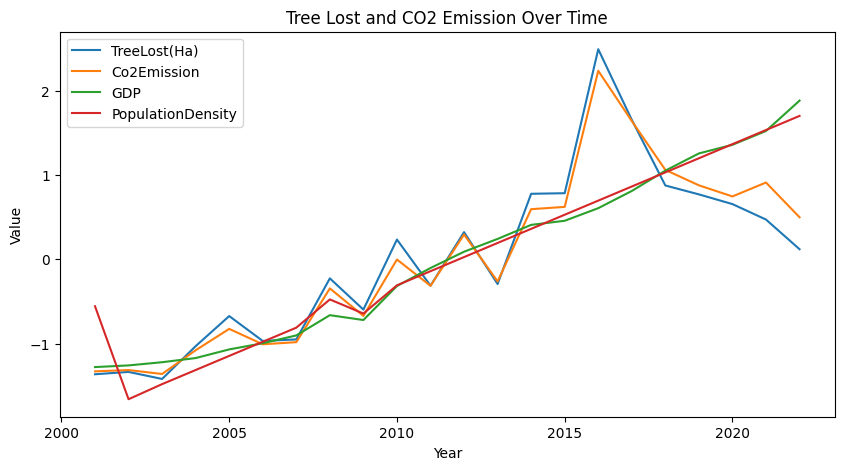

In [26]:
df = pd.read_csv("StandardScaler.csv")
df_features = df.drop("Year", axis=1)

df.set_index('Year').plot(figsize=(10,5))
plt.title('Tree Lost and CO2 Emission Over Time')
plt.xlabel('Year')
plt.ylabel('Value')
plt.show()


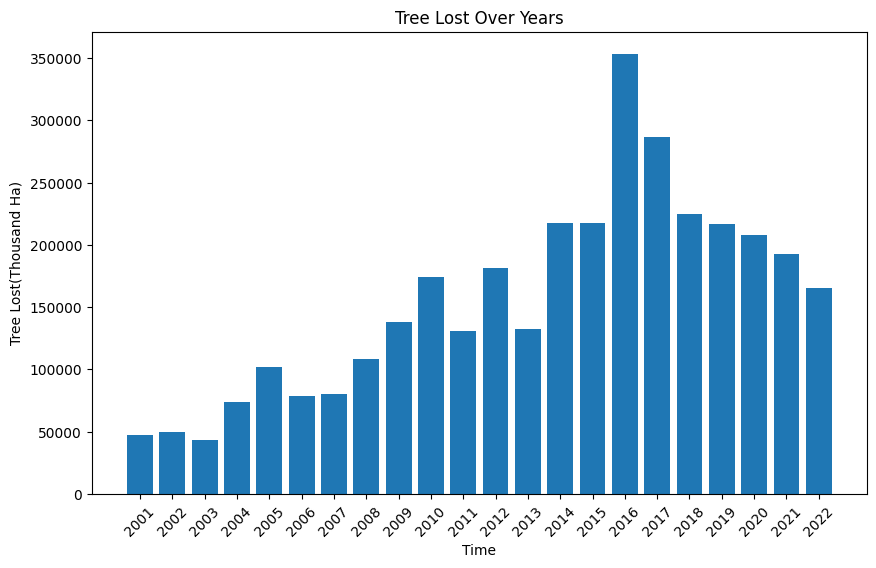

In [27]:
plt.figure(figsize=(10, 6))
plt.bar(data['Year'], data['TreeLost(Ha)'])
plt.xlabel('Time')
plt.ylabel('Tree Lost(Thousand Ha)')
plt.title('Tree Lost Over Years')
plt.xticks(data['Year'], rotation=45) 
plt.show()

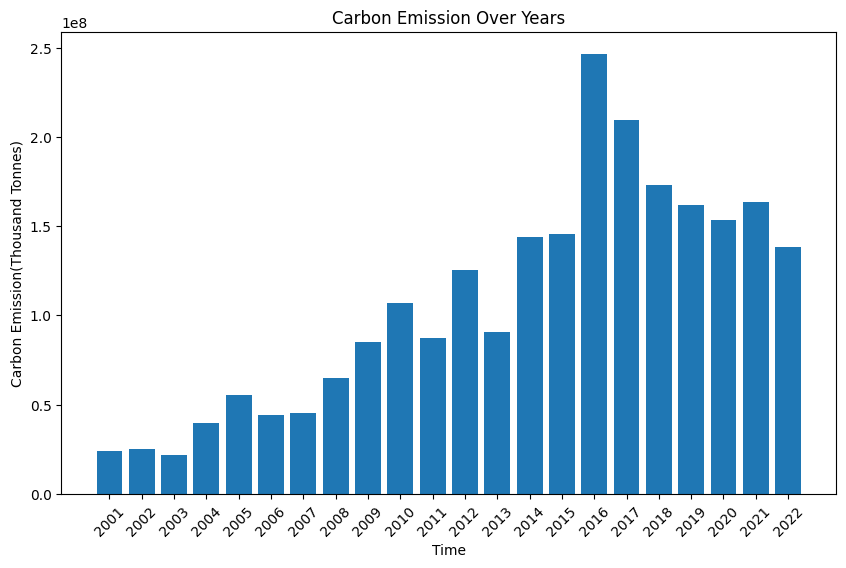

In [28]:
plt.figure(figsize=(10, 6))
plt.bar(data['Year'], data['Co2Emission'])
plt.xlabel('Time')
plt.ylabel('Carbon Emission(Thousand Tonnes)')
plt.title('Carbon Emission Over Years')
plt.xticks(data['Year'], rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

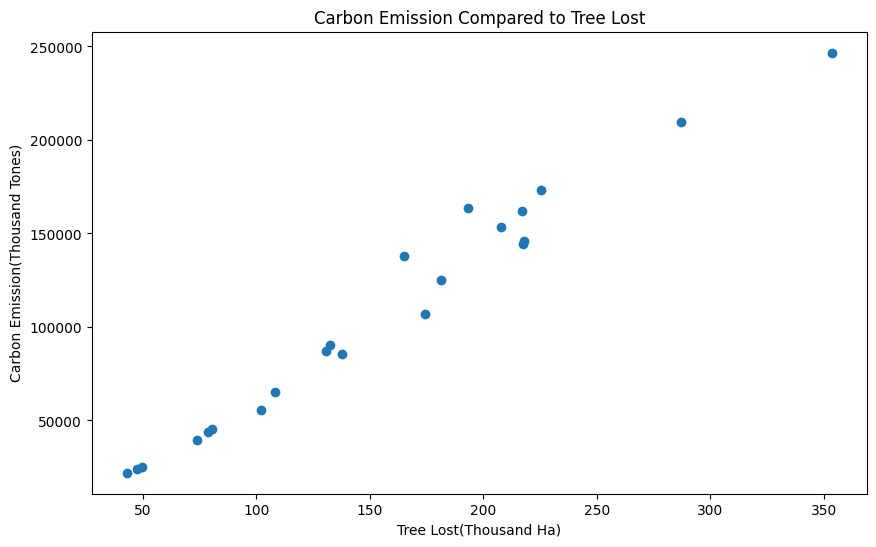

In [29]:
plt.figure(figsize=(10, 6))
data1 = pd.read_csv("TimeData.csv")
data1 = data1.drop(['Year'], axis=1)
data1['TreeLost(Ha)'] = data1['TreeLost(Ha)'] / 1000
data1['Co2Emission'] = data1['Co2Emission'] / 1000
plt.scatter(data1['TreeLost(Ha)'], data1['Co2Emission'])
plt.xlabel('Tree Lost(Thousand Ha)')
plt.ylabel('Carbon Emission(Thousand Tones)')
plt.title('Carbon Emission Compared to Tree Lost')
plt.show()

Theo như đề bài, chúng em sẽ đi dự đoán về chạy mô phỏng các kịch bản khác nhau để có thể dự đoán được diện tích rừng trong vòng từ 10, 20, 30, 50 và 100 năm tiếp theo.  Đây là bài toán về chuỗi thời gian (time-series). Có 1 số các phương pháp để có thể dùng để áp dụng như sau 
  - Mô hình dự báo chuỗi thời gian: Các mô hình ARIMA (AutoRegressive Integrated Moving Average) hoặc các biến thể của nó thường được sử dụng để mô hình hóa và dự đoán chuỗi thời gian. Chúng dựa vào các mẫu thay đổi trong dữ liệu để dự đoán các giá trị tương lai. Phương pháp chính của ARIMA là xác định các tham số  chính : p (phần tự hồi quy), d (cấp số học của việc chuyển đổi dữ liệu), và q (phần trung bình trượt). Các tham số này xác định qua việc sử dụng các kỹ thuật như kiểm tra ACF (hàm tự tương quan) và PACF (hàm tự tương quan riêng). Chúng em đã thử phương pháp này và đường dự đoán quá lệch chuẩn so với đường thực tế như ảnh dưới đây.
  <img src="ARIMA.png" height = 100>


- Mạng nơ-ron hồi quy (RNN) và LSTM: Đối với các chuỗi thời gian có sự phụ thuộc dài hạn và mô hình học tập từ dữ liệu lịch sử, các mạng nơ-ron hồi quy (RNN) và mạng nơ-ron hồi quy dài hạn (LSTM) có thể mang lại hiệu suất tốt. Tuy nhiên, chỉ với 20 điểm dữ liệu thu thập được (Xét từ năm 2001 - 2022) trong bài toán này, chúng em nghĩ rằng các mô hình này sẽ không hoạt động tốt và có khả năng overfit nếu như chúng ta cố gắng cho số epochs hoặc độ phức tạp của mạng neural network tăng lên.


Tại đây, chúng em quyết định sử dụng thuật toán Vector Auto Regression (VAR). VAR là một mô hình hồi quy tự hồi quy tích lũy. Nó dựa trên giả định rằng dữ liệu chuỗi thời gian có thể được mô hình hóa bằng một quá trình MA hoặc AR, hoặc cả hai. VAR có thể xử lý tốt các biến độc lập tuyến tính, nhưng nó có thể gặp khó khăn với các biến độc lập phi tuyến tính.
Mục đích của chúng ta là để tối ưu hàm mất mát
 $$
J(p, q, \theta) = \sum\limits_{t = 1}^{T} \left(y_{t} - \sum\limits_{i = 1}^{p} \alpha_{i}y_{t - i} - \sum\limits_{j = 1}^{q} \beta_{j}x_{t - j} \right)
$$
Trong đó: 
- p và q là số lượng tham số tự hồi quy trong mô hình VAR 
- $\alpha_{i}$ và $\beta_{j}$ là các tham số tự hồi quy trong mô hình VAR
- $y_{t}$ là giá trị của biến phụ thuộc tại thời điểm t
- $x_{t}$ là giá trị của biến độc lập tại thời điểm t






Như chúng ta có thể thấy các cột dữ liệu có đơn vị khác nhau và độ lệch cũng rất lớn (Ví dụ như Co2Emission lại quá to hơn so với GDP của Việt Nam), điều này sẽ ảnh hưởng đến mô hình của chúng ta. Vì vậy chúng ta sẽ sử dụng Standard Scaler để chuẩn hóa dữ liệu. Standard Scaler là một kỹ thuật chuẩn hóa dữ liệu phổ biến nhất cho các thuật toán học máy. Nó có thể được sử dụng để chuẩn hóa dữ liệu đầu vào và cũng có thể được sử dụng trong việc chuẩn hóa dữ liệu đầu ra. Kỹ thuật này loại bỏ trung bình và chia tỷ lệ biến độc lập với độ lệch chuẩn của chúng. 

Standard Scaler chia tỉ lệ tất cả các giá trị của tập dữ liệu sao cho chúng có trung bình là 0 và độ lệch chuẩn là 1. Điều này giúp cho các tính toán của mô hình VAR trở nên ổn định hơn.

Trong bài toán dự đoán lượng khí CO2 phát thải, việc sử dụng Standard Scaler có thể giúp cho mô hình VAR dự đoán chính xác hơn. Bởi vì các biến độc lập trong tập dữ liệu của bạn có thể có các đơn vị đo lường khác nhau và các phạm vi giá trị khác nhau. Việc sử dụng Standard Scaler sẽ giúp các biến độc lập có cùng một phạm vi giá trị, điều này sẽ giúp mô hình VAR học các mối quan hệ giữa các biến độc lập và biến phụ thuộc một cách chính xác hơn.

Công thức chuẩn hóa dữ liệu của Standard Scaler như sau:

$x_{scaled} = \frac{(x - \gamma)}{\sigma}$

Trong đó: 
- x là giá trị gốc
- $x_{scaled}$ là giá trị chuẩn hóa
- $\gamma$ là giá trị trung bình của tập dữ liệu 
- $\sigma$ là độ lệch chuẩn của tập dữ liệu

Chúng ta sẽ sử dụng Standard Scaler với VAR:
- Giúp cho các tính toán của mô hình VAR trở nên ổn định hơn.
- Giúp cho mô hình VAR dự đoán chính xác hơn.
- Giúp cho việc so sánh các mô hình VAR khác nhau trở nên dễ dàng hơn.


[[0.6954761  0.99116009 2.1296841  2.06323006]
 [1.20437624 1.47127536 2.37674183 2.35485073]
 [1.53563868 1.81419307 2.63674202 2.63170422]
 [1.75022151 2.05957157 2.91206765 2.90955355]
 [1.9182481  2.26456005 3.20252232 3.19884998]
 [2.0811542  2.46544628 3.50765388 3.5032806 ]
 [2.25500439 2.67737126 3.8274569  3.82367334]
 [2.44275994 2.90383391 4.16235217 4.16010762]
 [2.64310808 3.14420464 4.51300528 4.51278347]
 [2.8545049  3.39738991 4.88018887 4.88218952]
 [3.07625533 3.66292839 5.264718   5.26903012]
 [3.30839954 3.9409806  5.66743284 5.67412819]
 [3.55136549 4.23205922 6.08920131 6.09836681]
 [3.80572232 4.53681923 6.53092611 6.54266724]
 [4.07206932 4.85595744 6.9935506  7.00798638]
 [4.35100773 5.19018392 7.47806259 7.49532101]
 [4.64314563 5.54022421 7.98549705 8.00571271]
 [4.94910916 5.90682857 8.51693823 8.54025177]
 [5.26955075 6.29077951 9.07352185 9.10008015]
 [5.60515365 6.69289631 9.65643744 9.68639407]]


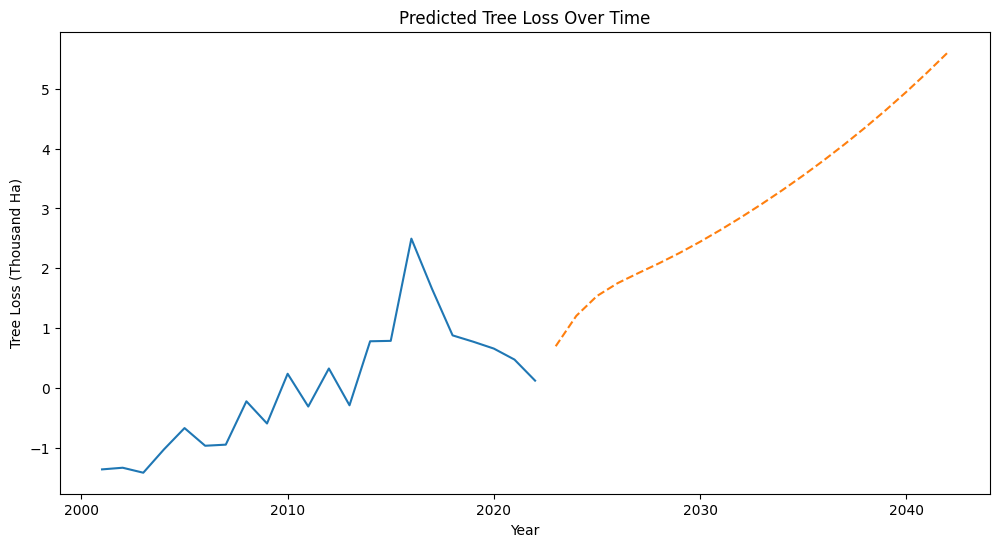

In [30]:
data = pd.read_csv("StandardScaler.csv")
data.head()
model = VAR(data[['TreeLost(Ha)', 'Co2Emission','GDP', 'PopulationDensity']])
model_fitted = model.fit()
steps = 20
forecast = model_fitted.forecast(data[['TreeLost(Ha)', 'Co2Emission','GDP', 'PopulationDensity']].values, steps= steps)

tree_loss_forecast = forecast[:, 0]
co2_emission = forecast[:, 1]
gdp = forecast[:,2]
print(forecast)
plt.figure(figsize=(12, 6))
plt.plot(data['Year'], data['TreeLost(Ha)'], label='Actual Tree Loss')
plt.plot(range(data['Year'].iloc[-1]+1, data['Year'].iloc[-1]+ steps + 1), tree_loss_forecast, label='Predicted Tree Loss', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Tree Loss (Thousand Ha)')
plt.title('Predicted Tree Loss Over Time')
plt.show()


[[0.6954761  0.99116009 2.1296841  2.06323006]
 [1.20437624 1.47127536 2.37674183 2.35485073]
 [1.53563868 1.81419307 2.63674202 2.63170422]
 [1.75022151 2.05957157 2.91206765 2.90955355]
 [1.9182481  2.26456005 3.20252232 3.19884998]]


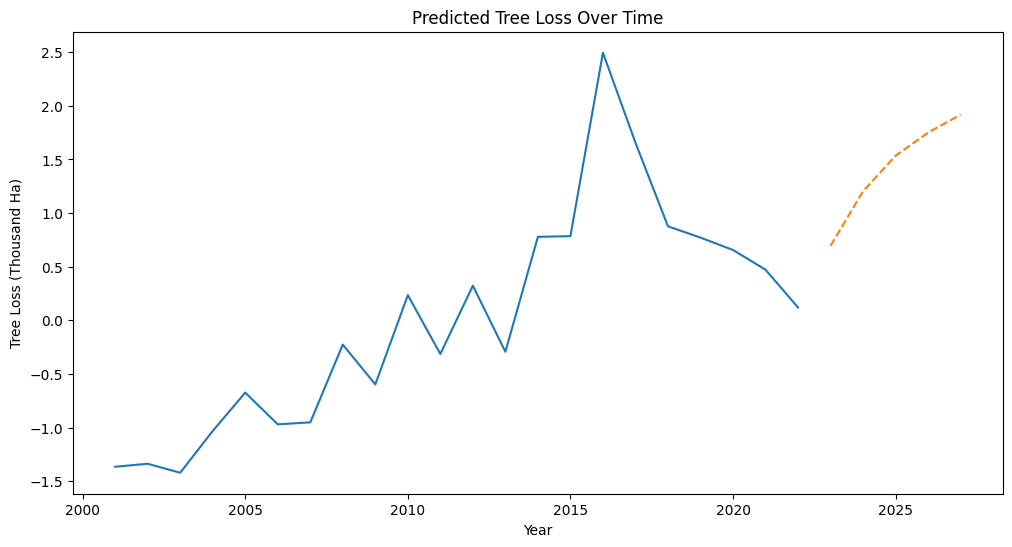

In [31]:
data = pd.read_csv("StandardScaler.csv")
data.head()
model = VAR(data[['TreeLost(Ha)', 'Co2Emission','GDP', 'PopulationDensity']])
model_fitted = model.fit()
steps = 5
forecast = model_fitted.forecast(data[['TreeLost(Ha)', 'Co2Emission','GDP', 'PopulationDensity']].values, steps= steps)

tree_loss_forecast = forecast[:, 0]
co2_emission = forecast[:, 1]
gdp = forecast[:,2]
print(forecast)
plt.figure(figsize=(12, 6))
plt.plot(data['Year'], data['TreeLost(Ha)'], label='Actual Tree Loss')
plt.plot(range(data['Year'].iloc[-1]+1, data['Year'].iloc[-1]+ steps + 1), tree_loss_forecast, label='Predicted Tree Loss', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Tree Loss (Thousand Ha)')
plt.title('Predicted Tree Loss Over Time')
plt.show()


In [32]:
tree_loss_forecast = forecast[:, 0]
co2_emission_forecast = forecast[:, 1]
gdp_forecast = forecast[:, 2]
population_density_forecast = forecast[:, 3]

for i in range(len(tree_loss_forecast)):
    print(f"Dự đoán năm 2025 (bước {i+1}):")
    print(f"TreeLost(Ha): {tree_loss_forecast[i]}")
    print(f"Co2Emission: {co2_emission_forecast[i]}")
    print(f"GDP: {gdp_forecast[i]}")
    print(f"PopulationDensity: {population_density_forecast[i]}")
    print("="*30)


Dự đoán năm 2025 (bước 1):
TreeLost(Ha): 0.6954760965039706
Co2Emission: 0.9911600903651264
GDP: 2.129684099272354
PopulationDensity: 2.0632300558102963
Dự đoán năm 2025 (bước 2):
TreeLost(Ha): 1.204376235848538
Co2Emission: 1.471275363773538
GDP: 2.376741827769526
PopulationDensity: 2.3548507258359543
Dự đoán năm 2025 (bước 3):
TreeLost(Ha): 1.5356386826542527
Co2Emission: 1.8141930695109485
GDP: 2.6367420199783664
PopulationDensity: 2.631704219281406
Dự đoán năm 2025 (bước 4):
TreeLost(Ha): 1.7502215147896685
Co2Emission: 2.059571572785425
GDP: 2.9120676457744312
PopulationDensity: 2.9095535501792216
Dự đoán năm 2025 (bước 5):
TreeLost(Ha): 1.9182481001870464
Co2Emission: 2.2645600507609913
GDP: 3.202522319064102
PopulationDensity: 3.1988499770560086


In [33]:
print(model_fitted.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 31, Aug, 2023
Time:                     22:59:45
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -13.1885
Nobs:                     21.0000    HQIC:                  -13.9673
Log likelihood:           49.7331    FPE:                7.18596e-07
AIC:                     -14.1832    Det(Omega_mle):     3.05822e-07
--------------------------------------------------------------------
Results for equation TreeLost(Ha)
                          coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------
const                        0.093625         0.128720            0.727           0.467
L1.TreeLost(Ha)              3.106374         1.266536            2.453           0.014
L1.Co2Emission           

In [34]:
residuals = model_fitted.resid['TreeLost(Ha)']
print('ADF Statistic:', adfuller(residuals)[0])
print('p-value:', adfuller(residuals)[1])


ADF Statistic: -6.138382098684188
p-value: 8.082495044409177e-08



Giá trị của "ADF Statistic" (Augmented Dickey-Fuller Statistic) là -6.138, và giá trị "p-value" là 8.08e-08, hay nói cách khác, rất gần bằng 0. Điều này có thể được hiểu như sau:

ADF Statistic: Giá trị âm lớn cho thấy mạnh mẽ về việc bác bỏ giả thuyết null, tức là chuỗi có tính đơn vị gốc (unit root). Trong trường hợp này, chúng ta có thể kết luận rằng chuỗi số dư (residuals) có tính ổn định (stationary).

p-value: Giá trị này rất nhỏ, ít hơn mức ngưỡng thông thường như 0.05 hoặc 0.01. Điều này cũng chỉ ra rằng chúng ta có đủ bằng chứng để bác bỏ giả thuyết null.

Kết luận: Với một giá trị ADF như vậy và một p-value rất nhỏ, chúng ta có thể tin tưởng rằng chuỗi số dư (residuals) của mô hình là ổn định, hay nói cách khác, đã đạt được tính chất không dừng (stationarity). Điều này là một dấu hiệu tích cực cho thấy mô hình của chúng ta đã khá tốt trong việc nắm bắt các mẫu dữ liệu trong tập dữ liệu huấn luyện. Tuy nhiên, điều này không đảm bảo mô hình sẽ hoạt động tốt trên dữ liệu mới hoặc tương lai.
